## Predict the number of wins for a given baseball team using machine learning
* There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
* Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

* Output: Number of predicted wins (W)


In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
#warnings.filterwarnings('ignore')

# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
# Load data
df = pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
# Lets check for null values
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
# Lets check target values
df["W"].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

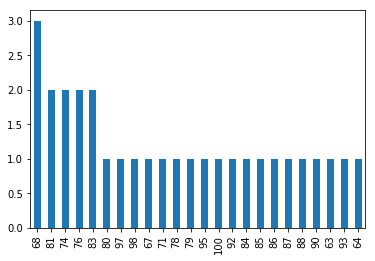

In [7]:
# Plot target values
df["W"].value_counts().plot(kind="bar");

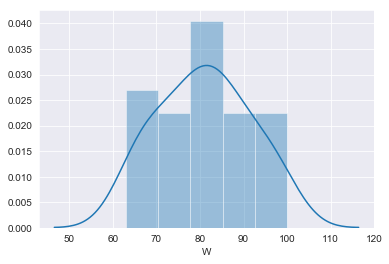

In [8]:
sns.set_style('darkgrid')
sns.distplot(df['W'])
plt.show()

In [9]:
df.describe()
# Mean is greater than median for most of the cases
# Std deviation is high in mostof the cases

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
# Lets check correlation matrix
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


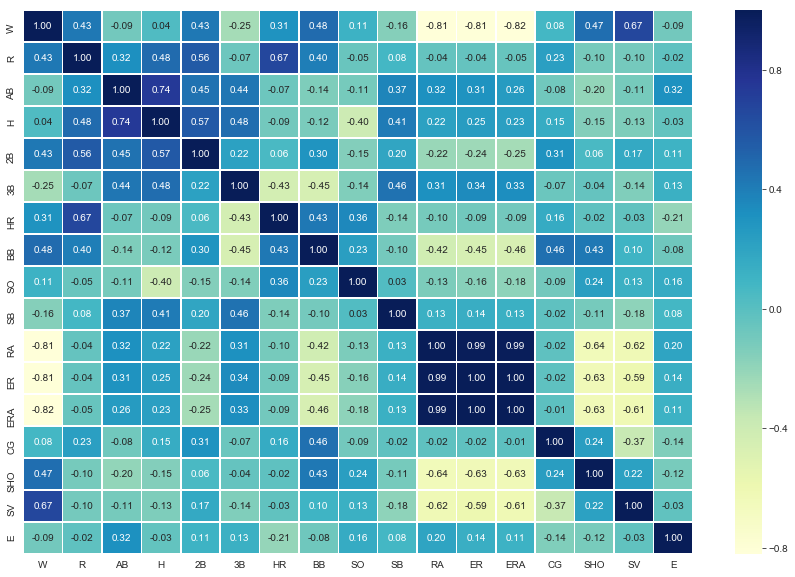

In [11]:
# Let's plot the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
# Inputs like RA, ER and ERA are negativelycorrelatedto output W.

In [12]:
# Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(30, 17)
(29, 17)


In [13]:
# Lets check Skewness 
df.skew()
# We can see some skewness in below data. All the values which is greater than 0.55 needs to be treated

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [14]:
# Treating the skewness 
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.sqrt(df[col])

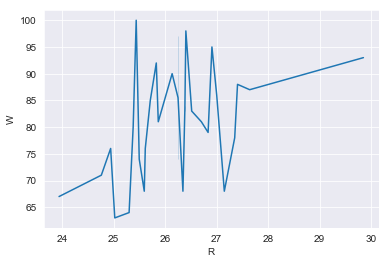

In [15]:
# Lets check how Run is changing with respect to Win
sns.lineplot(df["R"],df["W"])
plt.show()

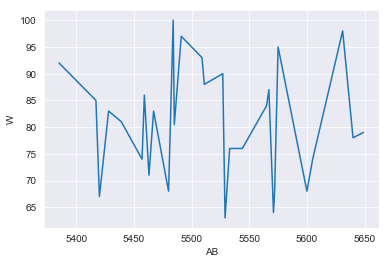

In [16]:
# Lets check how At Bat is changing with respect to Win
sns.lineplot(df["AB"],df["W"])
plt.show()

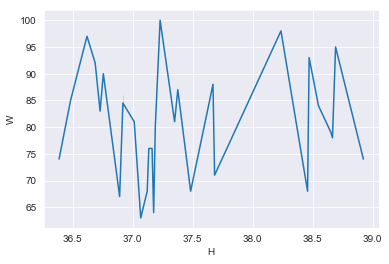

In [17]:
# Lets check how Hits is changing with respect to Win
sns.lineplot(df["H"],df["W"])
plt.show()

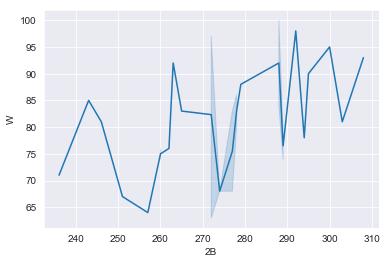

In [18]:
# Lets check how Doubles is changing with respect to Win
sns.lineplot(df["2B"],df["W"])
plt.show()

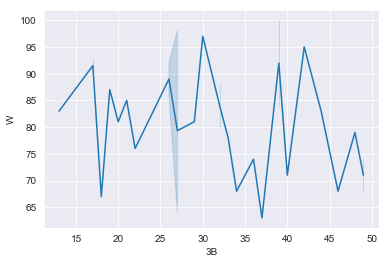

In [19]:
# Lets check how Triples is changing with respect to Win
sns.lineplot(df["3B"],df["W"])
plt.show()

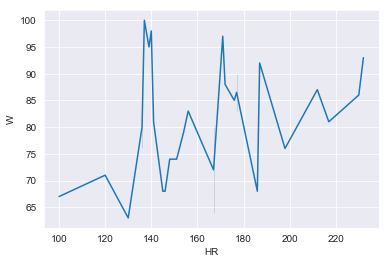

In [20]:
# Lets check how Homeruns is changing with respect to Win
sns.lineplot(df["HR"],df["W"])
plt.show()

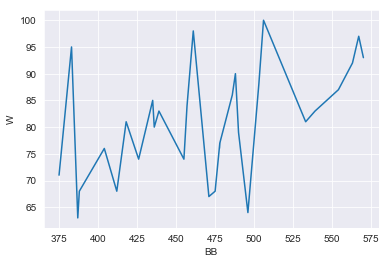

In [21]:
# Lets check how Walks is changing with respect to Win
sns.lineplot(df["BB"],df["W"])
plt.show()

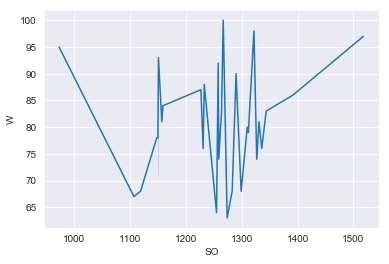

In [22]:
# Lets check how Strikeouts is changing with respect to Win
sns.lineplot(df["SO"],df["W"])
plt.show()

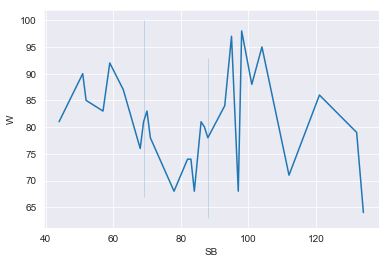

In [23]:
# Lets check how Stolen Bases is changing with respect to Win
sns.lineplot(df["SB"],df["W"])
plt.show()

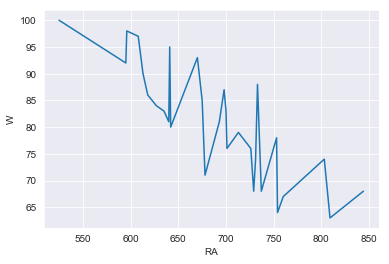

In [24]:
# Lets check how Runs Allowed is changing with respect to Win
sns.lineplot(df["RA"],df["W"])
plt.show()
# The below graph  shows that with increase in Runs Allowed has a reverse impact on win

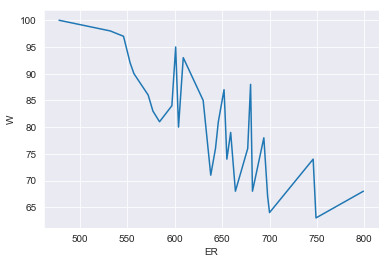

In [25]:
# Lets check how Earned Run is changing with respect to Win
sns.lineplot(df["ER"],df["W"])
plt.show()

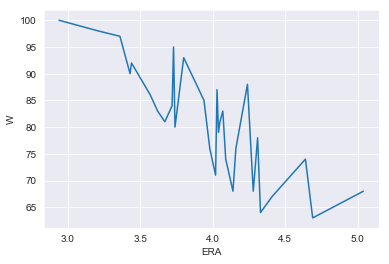

In [26]:
# Lets check how Earned Run Average is changing with respect to Win
sns.lineplot(df["ERA"],df["W"])
plt.show()

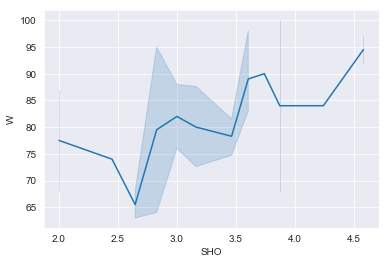

In [27]:
# Lets check how Shutouts is changing with respect to Win
sns.lineplot(df["SHO"], df["W"])
plt.show()

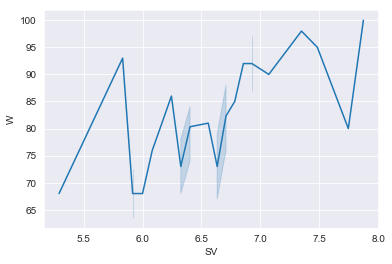

In [28]:
# Lets check how Saves is changing with respect to Win
sns.lineplot(df["SV"], df["W"])
plt.show()

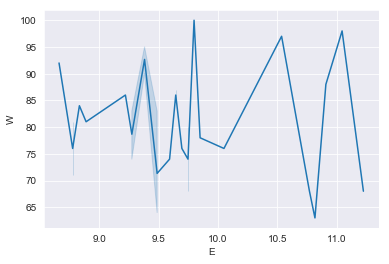

In [29]:
# Lets check how Erros is changing with respect to Win
sns.lineplot(df["E"],df["W"])
plt.show()

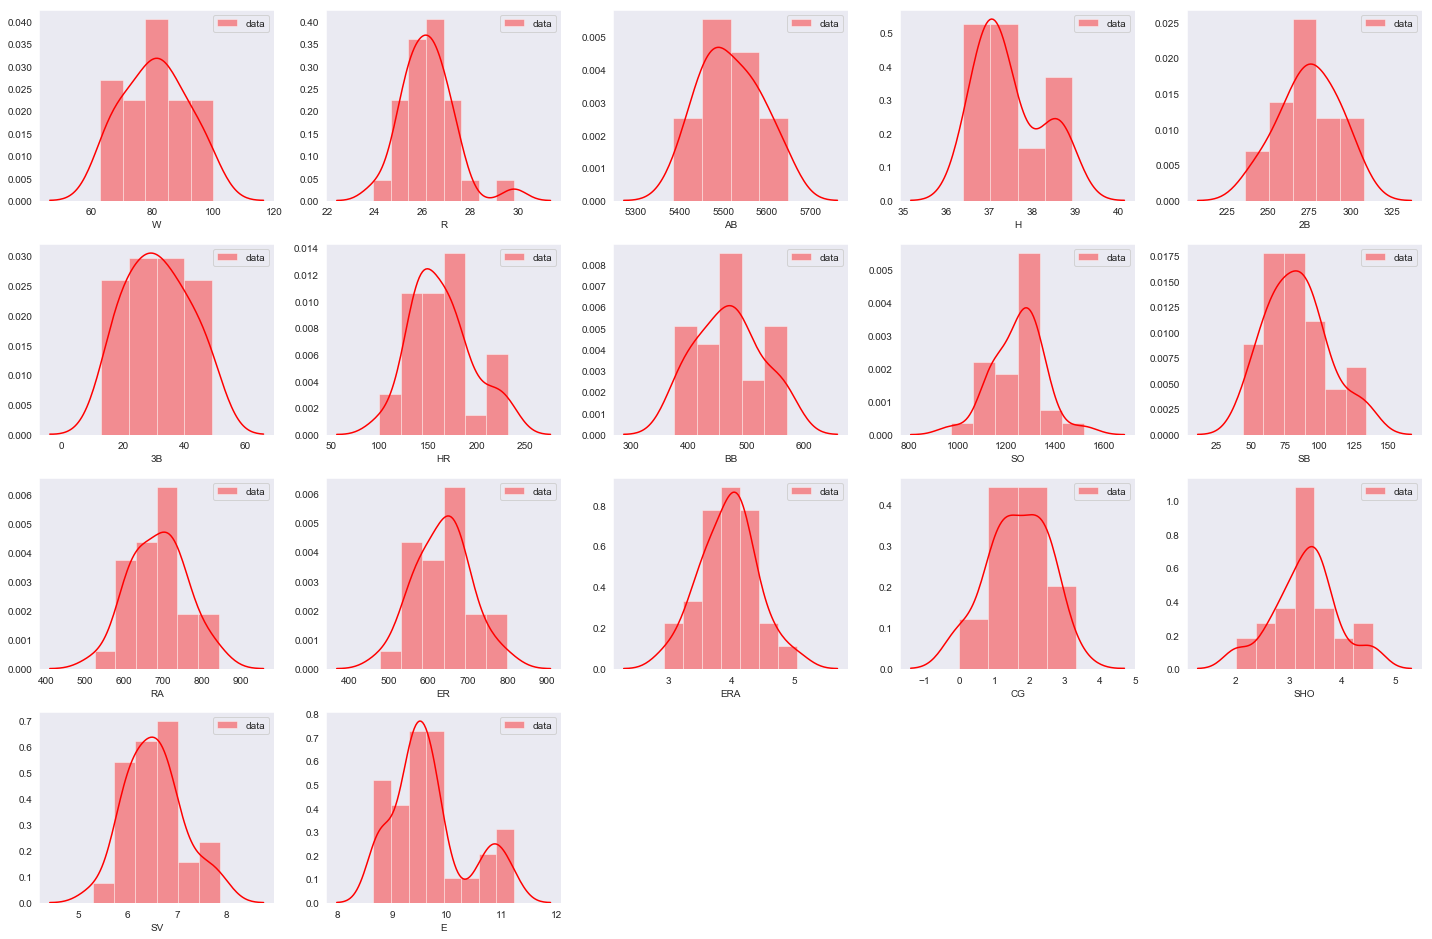

In [30]:
# Plot  Displot Through Iteration
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [31]:
# Lets start modelling
# Split data into X and y
# Lets remove RA, ER and ERA which is highly correlated

# X = df.drop(["W","RA","ER","ERA"], axis=1)
X = df.drop(["W"], axis=1)
y = df["W"]

In [32]:
X.shape, y.shape

((30, 16), (30,))

In [33]:
#y = y.values.reshape(-1,1)

In [34]:
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24, 16), (24,), (6, 16), (6,))

### We're going to try 3 different machine learning models:

* Linear Regression
* Decision Tree
* Random Forest Regressor

### Linear Regression

In [36]:
linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train)
linearmodel.score(X_train,y_train)

0.972155037967286

In [37]:
# Predict the value
pred = linearmodel.predict(X_test)
print('Mean absolute error(MAE):',mean_absolute_error(y_test, pred))
print('Mean sqaured error(MSE):',mean_squared_error(y_test, pred))
print('R2 Score: %.2f' % r2_score(y_test, pred))

Mean absolute error(MAE): 4.065889323685241
Mean sqaured error(MSE): 27.427456735521123
R2 Score: 0.79


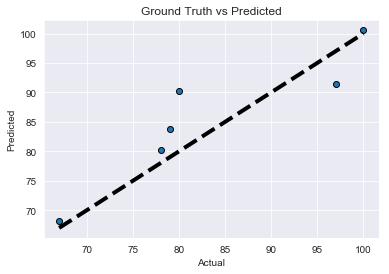

In [38]:
# Lets Visualize the goodness of prediction
fig, ax = plt.subplots()
ax.scatter(y_test, pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Boost through GradientBoostingRegressor By using Parameters

In [39]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gradboostmodel = ensemble.GradientBoostingRegressor(**params)

gradboostmodel.fit(X_train, np.ravel(y_train))
model_score = gradboostmodel.score(X_train, y_train)
print("model_Score:", model_score)
X_predicted = gradboostmodel.predict(X_train)
print("Mean squared error(MSE): %.2f"% mean_squared_error(y_train, X_predicted))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(y_train, X_predicted))

model_Score: 0.999940471479361
Mean squared error(MSE): 0.01
R2 Score: 1.00


In [40]:
# Predict the value
predgb = gradboostmodel.predict(X_test)
print('Mean absolute error(MAE):',mean_absolute_error(y_test, predgb))
print('Mean sqaured error(MSE):',mean_squared_error(y_test, predgb))
print('R2 Score: %.2f' % r2_score(y_test, predgb))

Mean absolute error(MAE): 7.249651370937696
Mean sqaured error(MSE): 71.83525521387337
R2 Score: 0.45


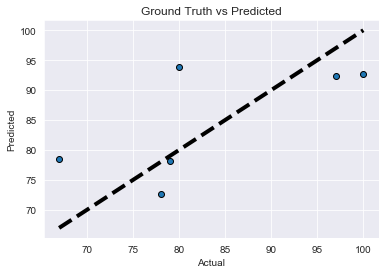

In [41]:
# Lets Visualize the goodness of prediction

fig, ax = plt.subplots()
ax.scatter(y_test, predgb, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### # Decision Tree

In [42]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
print(r2_score(y_train, dt.predict(X_train)))
print(mean_squared_error(y_train, dt.predict(X_train)))

1.0
0.0


In [43]:
# Predict the value
print('R2 Score : %.2f' % r2_score(y_test,dt.predict(X_test)))
print("MSE: %.2f" % mean_squared_error(y_test,dt.predict(X_test)))

R2 Score : 0.27
MSE: 95.83


### Decision Tree Regressor Using GridSearchCV

In [44]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test, y_test)   
print("R-Squared on test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.9731721905566111
R-Squared on test dataset=0.8549715009499683


In [45]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [46]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::-0.46010680229773226
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [47]:
# Boosting Decision Tree
from sklearn.ensemble import AdaBoostRegressor
ada_reg5=AdaBoostRegressor()
add_reg5=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 cross_val_score: ",cross_val_score(add_reg5, X, np.ravel(y), cv=5,scoring="r2").mean())
print("Standard deviation cross_val_score: ",cross_val_score(add_reg5, X, np.ravel(y), cv=5,scoring="r2").std())

Mean r2 cross_val_score:  -0.9792215561278098
Standard deviation cross_val_score:  3.589230303462997


### Random Forest 

In [48]:
random_model = RandomForestRegressor()
random_model.fit(X_train, np.ravel(y_train))
print(r2_score(y_train, random_model.predict(X_train)))
print(mean_squared_error(y_train,random_model.predict(X_train)))

0.9250899914212182
7.2766750000000044


In [49]:
print(r2_score(y_test, random_model.predict(X_test)))
print(mean_squared_error(y_test,random_model.predict(X_test)))

0.5378894236858772
60.80604999999999


#### Random Forest Regressor with GridSearchCV


In [50]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 100, 200]}
grid_search_rf = GridSearchCV(random_model, params, cv = 3)

In [51]:
grid_search_rf.fit(X_train, np.ravel(y_train))
print(grid_search_rf.best_params_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 25}


In [52]:
random_model = RandomForestRegressor(min_samples_leaf= 1, min_samples_split= 2, n_estimators= 25)
random_model.fit(X_train, np.ravel(y_train))
print(r2_score(y_train, random_model.predict(X_train)))
print(mean_squared_error(y_train,random_model.predict(X_train)))

print("Mean cross_val_score: ",cross_val_score(grid_search_rf, X, np.ravel(y), cv=5, scoring="r2").mean())
print("Standard deviation cross_val_score: ",cross_val_score(grid_search_rf, X, np.ravel(y), cv=5, scoring="r2").std())

0.9269904489562483
7.092066666666663
Mean cross_val_score:  -0.8087658983000697
Standard deviation cross_val_score:  1.7403736579166122


In [53]:
print('R2 Score : %.2f' % r2_score(y_test, random_model.predict(X_test)))
print('MSE : %.2f' % mean_squared_error(y_test,random_model.predict(X_test)))

R2 Score : 0.44
MSE : 73.26


#### Note: linearmodel has the maximum R2 score 0.79 so we can choose this as final model

In [54]:
#Lets save the model
import pickle
filename = 'baseball_model.pkl'
pickle.dump(linearmodel, open(filename, 'wb'))